# Import Libraries

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import spearmanr
import statsmodels.api as sm
#import mplcursors
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from math import sqrt

plt.style.use('seaborn-darkgrid')

In [3]:
HealthInsDF = pd.read_csv('COVID_HealthIns.csv', index_col = 0)
HealthInsDF.head()

,State,cases,deaths,Population Per State (2014),Total Health Insurance Enrollment Per State (2014),Total Health Insurance Enrollment (Percent),Medicare Enrollment Per State (2014),Medicare Enrollment (Percent),Medicaid Enrollment Per State (2014),Medicaid Enrollment (Percent),Private Enrollment Per State (2014),Private Enrollment (Percent)
0,Alabama,387786,14345,4843.0,4977.0,102.766880,947.0,19.553995,988.0,20.400578,3042.0,62.812306
1,Alaska,18316,367,737.0,611.0,82.903664,80.0,10.854817,113.0,15.332429,418.0,56.716418
2,Arizona,426614,18857,6720.0,6219.0,92.544643,1096.0,16.309524,1388.0,20.654762,3735.0,55.580357
3,Arkansas,161569,3301,2967.0,2986.0,100.640377,584.0,19.683182,812.0,27.367711,1590.0,53.589484
4,California,2664110,102387,38681.0,38951.0,100.698017,5476.0,14.156821,11505.0,29.743285,21970.0,56.797911


In [78]:
HealthInsDF = HealthInsDF.drop(columns = [col for col in HealthInsDF.columns if '(Percent)' in col])
HealthInsDF = HealthInsDF.drop(columns = ['cases', 'deaths', 'Population Per State (2014)'])
HealthInsDF.head()

,State,Total Health Insurance Enrollment Per State (2014),Medicare Enrollment Per State (2014),Medicaid Enrollment Per State (2014),Private Enrollment Per State (2014)
0,Alabama,4977.0,947.0,988.0,3042.0
1,Alaska,611.0,80.0,113.0,418.0
2,Arizona,6219.0,1096.0,1388.0,3735.0
3,Arkansas,2986.0,584.0,812.0,1590.0
4,California,38951.0,5476.0,11505.0,21970.0


In [79]:
COVID = pd.read_csv('COVID.csv', index_col = 0)
COVID.head()

,State,cases,deaths
0,Alabama,26912,785
1,Alaska,751,10
2,Arizona,39298,1228
3,Arkansas,13191,188
4,California,159098,5202


In [80]:
HealthInsDF = pd.merge(HealthInsDF, COVID, how = 'left', on = 'State')
HealthInsDF.head()

,State,Total Health Insurance Enrollment Per State (2014),Medicare Enrollment Per State (2014),Medicaid Enrollment Per State (2014),Private Enrollment Per State (2014),cases,deaths
0,Alabama,4977.0,947.0,988.0,3042.0,26912,785
1,Alaska,611.0,80.0,113.0,418.0,751,10
2,Arizona,6219.0,1096.0,1388.0,3735.0,39298,1228
3,Arkansas,2986.0,584.0,812.0,1590.0,13191,188
4,California,38951.0,5476.0,11505.0,21970.0,159098,5202


In [81]:
HealthInsDF.shape

(51, 7)

In [82]:
HealthInsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   State                                               51 non-null     object 
 1   Total Health Insurance Enrollment Per State (2014)  51 non-null     float64
 2   Medicare Enrollment Per State (2014)                51 non-null     float64
 3   Medicaid Enrollment Per State (2014)                51 non-null     float64
 4   Private Enrollment Per State (2014)                 51 non-null     float64
 5   cases                                               51 non-null     int64  
 6   deaths                                              51 non-null     int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 3.2+ KB


In [83]:
HealthInsDF.isnull().sum()

State                                                 0
Total Health Insurance Enrollment Per State (2014)    0
Medicare Enrollment Per State (2014)                  0
Medicaid Enrollment Per State (2014)                  0
Private Enrollment Per State (2014)                   0
cases                                                 0
deaths                                                0
dtype: int64

In [84]:
HealthInsDF.count()

State                                                 51
Total Health Insurance Enrollment Per State (2014)    51
Medicare Enrollment Per State (2014)                  51
Medicaid Enrollment Per State (2014)                  51
Private Enrollment Per State (2014)                   51
cases                                                 51
deaths                                                51
dtype: int64

In [85]:
HealthInsDF.describe()

,Total Health Insurance Enrollment Per State (2014),Medicare Enrollment Per State (2014),Medicaid Enrollment Per State (2014),Private Enrollment Per State (2014),cases,deaths
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,6092.392157,1036.235294,1285.235294,3770.921569,41994.235294,2290.549020
std,6838.985975,1082.000898,1810.003355,4031.879938,63513.183767,4748.588326
min,550.000000,80.000000,69.000000,389.000000,614.000000,10.000000
25%,1684.500000,302.500000,293.500000,1035.500000,9231.500000,212.000000
50%,4397.000000,755.000000,910.000000,2497.000000,20152.000000,704.000000
75%,7168.000000,1197.500000,1435.500000,4460.000000,46961.500000,2469.500000
max,38951.000000,5476.000000,11505.000000,21970.000000,389349.000000,30683.000000


In [4]:
corr = HealthInsDF.corr()
corr

,cases,deaths,Population Per State (2014),Total Health Insurance Enrollment Per State (2014),Total Health Insurance Enrollment (Percent),Medicare Enrollment Per State (2014),Medicare Enrollment (Percent),Medicaid Enrollment Per State (2014),Medicaid Enrollment (Percent),Private Enrollment Per State (2014),Private Enrollment (Percent)
cases,1.000000,0.990033,0.491439,0.518568,0.075764,0.521194,-0.088839,0.504885,0.191341,0.513086,-0.074809
deaths,0.990033,1.000000,0.399744,0.429838,0.108132,0.434067,-0.054266,0.425485,0.195058,0.421605,-0.055243
Population Per State (2014),0.491439,0.399744,1.000000,0.994317,-0.186777,0.983306,-0.215491,0.951948,0.156279,0.995356,-0.289828
Total Health Insurance Enrollment Per State (2014),0.518568,0.429838,0.994317,1.000000,-0.121462,0.983243,-0.194454,0.971279,0.190016,0.996334,-0.257955
Total Health Insurance Enrollment (Percent),0.075764,0.108132,-0.186777,-0.121462,1.000000,-0.150774,0.449643,-0.044072,0.551222,-0.145780,0.401304
Medicare Enrollment Per State (2014),0.521194,0.434067,0.983306,0.983243,-0.150774,1.000000,-0.115247,0.928093,0.165119,0.982801,-0.297579
Medicare Enrollment (Percent),-0.088839,-0.054266,-0.215491,-0.194454,0.449643,-0.115247,1.000000,-0.182323,0.213070,-0.217062,-0.102114
Medicaid Enrollment Per State (2014),0.504885,0.425485,0.951948,0.971279,-0.044072,0.928093,-0.182323,1.000000,0.297378,0.949523,-0.284583
Medicaid Enrollment (Percent),0.191341,0.195058,0.156279,0.190016,0.551222,0.165119,0.213070,0.297378,1.000000,0.144499,-0.482893
Private Enrollment Per State (2014),0.513086,0.421605,0.995356,0.996334,-0.145780,0.982801,-0.217062,0.949523,0.144499,1.000000,-0.229935


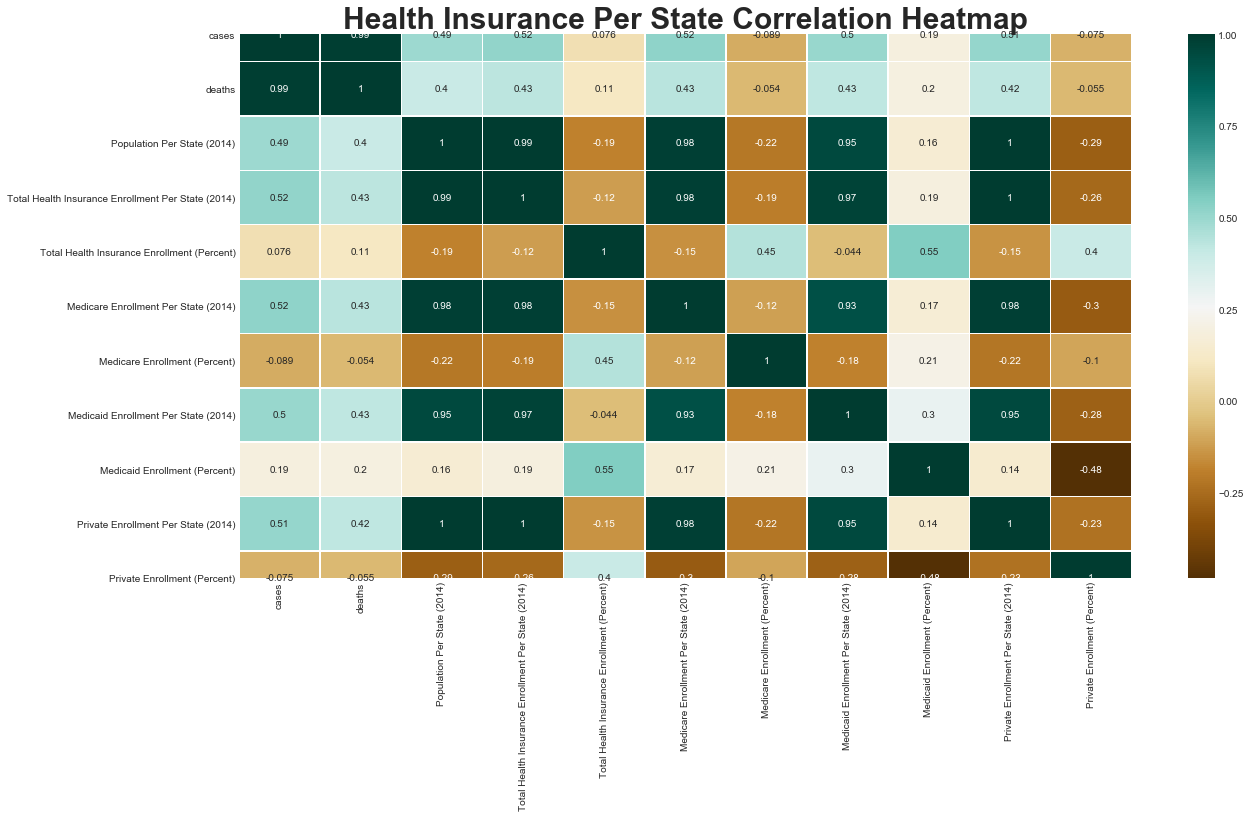

In [5]:
plt.figure(figsize = (20,10))
sns.heatmap(corr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Health Insurance Per State Correlation Heatmap', fontweight = 'bold', fontsize = 30);

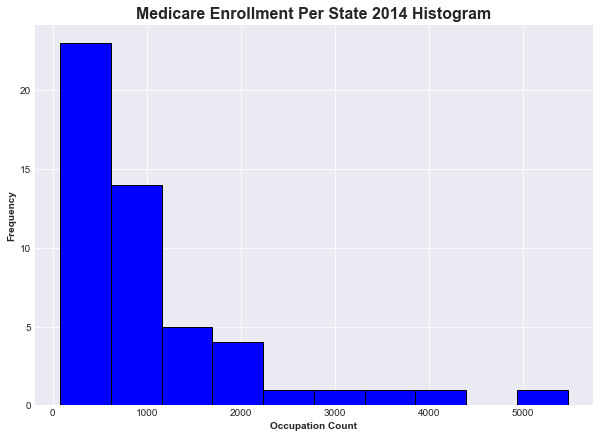

In [88]:
HealthInsDF['Medicare Enrollment Per State (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Medicare Enrollment Per State 2014 Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Occupation Count', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

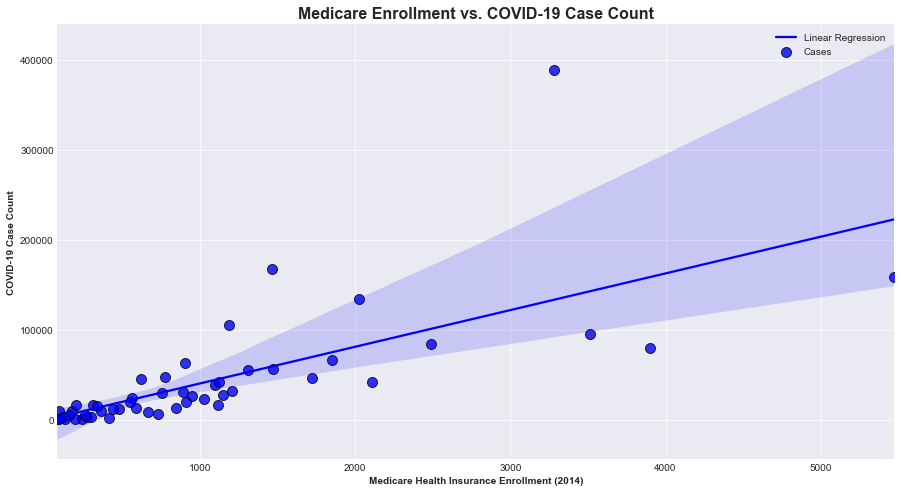

In [89]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Medicare Enrollment Per State (2014)', y = 'cases', data = HealthInsDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Medicare Enrollment vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Medicare Health Insurance Enrollment (2014)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [90]:
spearmanr(HealthInsDF['cases'], HealthInsDF['Medicare Enrollment Per State (2014)'])

SpearmanrResult(correlation=0.8864253393665158, pvalue=5.1553412290669535e-18)

In [91]:
model2 = sm.OLS(HealthInsDF['cases'], HealthInsDF['Medicare Enrollment Per State (2014)']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.642
Model:                            OLS   Adj. R-squared (uncentered):              0.635
Method:                 Least Squares   F-statistic:                              89.56
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    9.93e-13
Time:                        23:02:25   Log-Likelihood:                         -619.10
No. Observations:                  51   AIC:                                      1240.
Df Residuals:                      50   BIC:                                      1242.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Medicare Enrollment Per State (2014)    40.6431      4.295      9.464      0.000      32.017      49.269
==============================================================================
Omnibus:                       71.983   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              817.287
Skew:                           3.688   Prob(JB):                    3.38e-178
Kurtosis:                      21.172   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

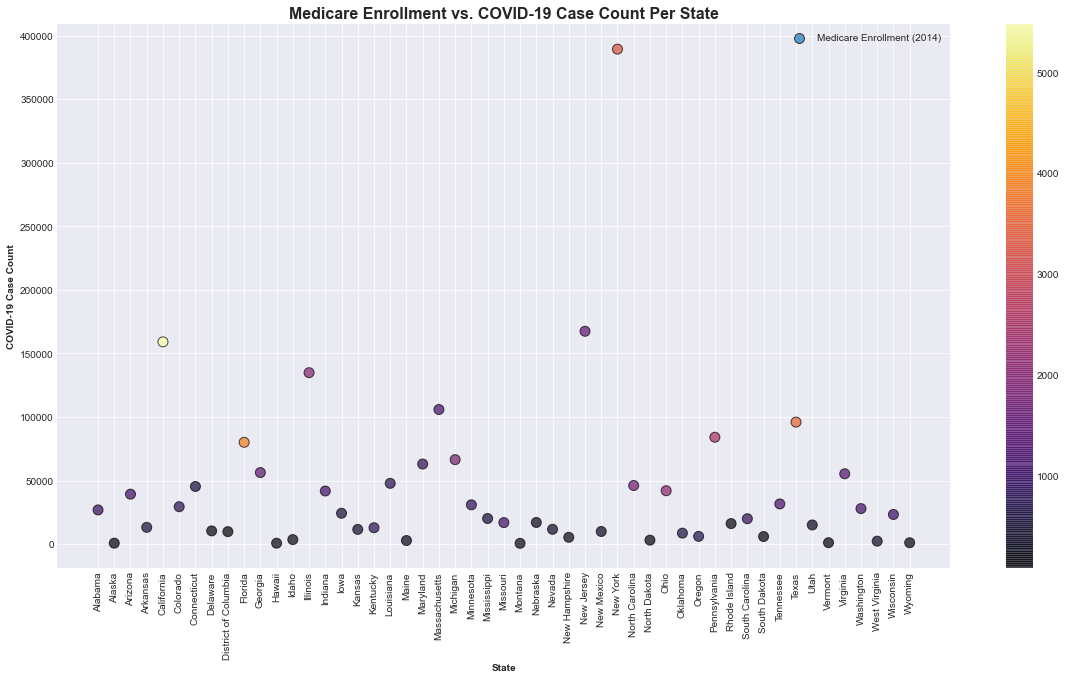

In [92]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HealthInsDF['State'] 
y = HealthInsDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HealthInsDF['Medicare Enrollment Per State (2014)'], cmap = 'inferno')
plt.title('Medicare Enrollment vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Medicare Enrollment (2014)'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

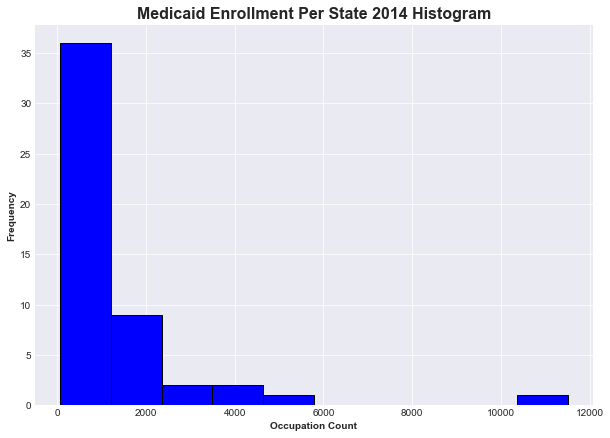

In [93]:
HealthInsDF['Medicaid Enrollment Per State (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Medicaid Enrollment Per State 2014 Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Occupation Count', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

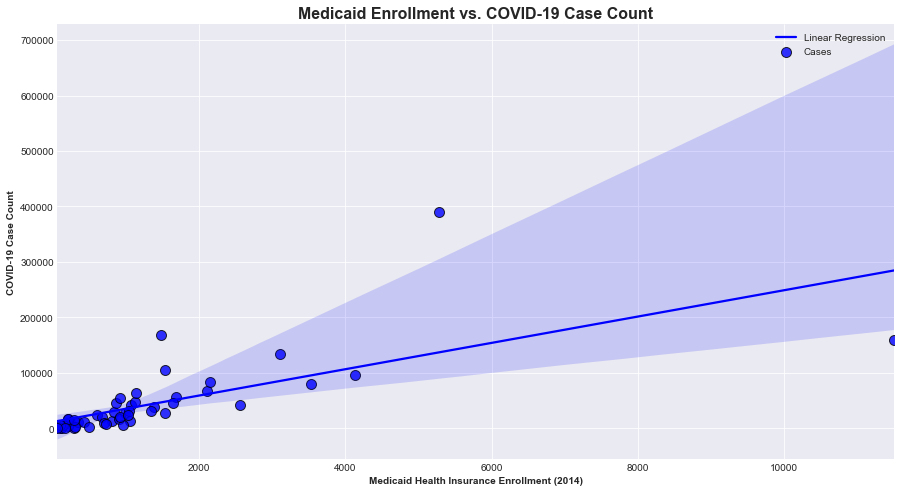

In [94]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Medicaid Enrollment Per State (2014)', y = 'cases', data = HealthInsDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Medicaid Enrollment vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Medicaid Health Insurance Enrollment (2014)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [95]:
spearmanr(HealthInsDF['cases'], HealthInsDF['Medicaid Enrollment Per State (2014)'])

SpearmanrResult(correlation=0.8837051459339442, pvalue=8.912708238444568e-18)

In [96]:
model3 = sm.OLS(HealthInsDF['cases'], HealthInsDF['Medicaid Enrollment Per State (2014)']).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.610
Model:                            OLS   Adj. R-squared (uncentered):              0.602
Method:                 Least Squares   F-statistic:                              78.29
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    8.35e-12
Time:                        23:02:26   Log-Likelihood:                         -621.25
No. Observations:                  51   AIC:                                      1244.
Df Residuals:                      50   BIC:                                      1246.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Medicaid Enrollment Per State (2014)    26.7859      3.027      8.848      0.000      20.705      32.866
==============================================================================
Omnibus:                       52.182   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              479.113
Skew:                           2.308   Prob(JB):                    9.16e-105
Kurtosis:                      17.288   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

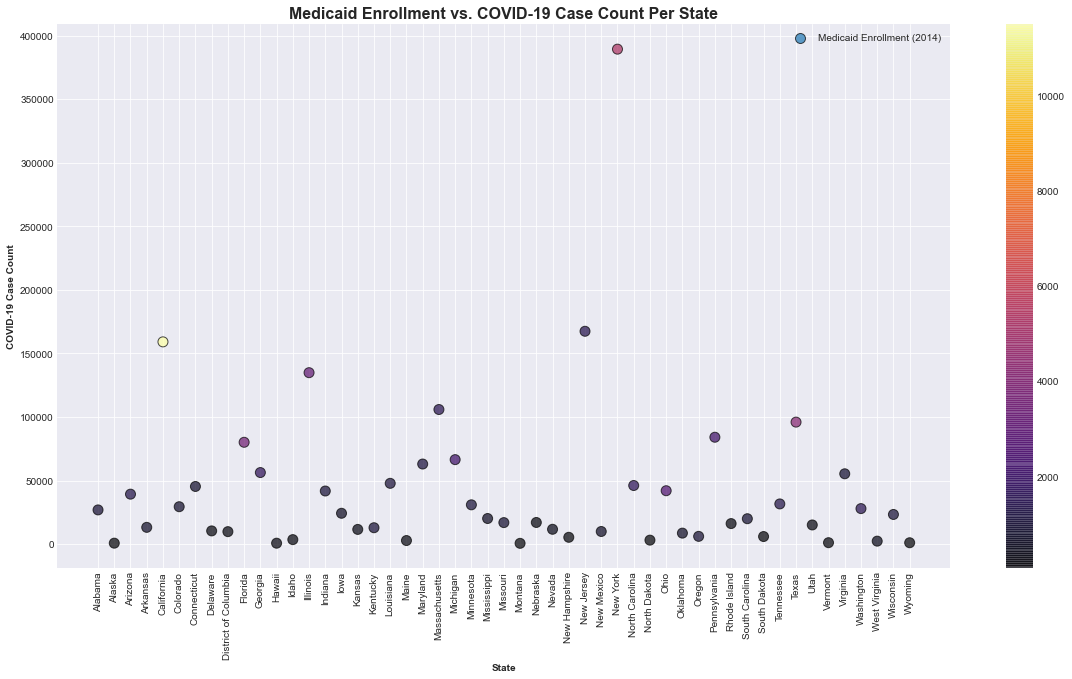

In [97]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HealthInsDF['State'] 
y = HealthInsDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HealthInsDF['Medicaid Enrollment Per State (2014)'], cmap = 'inferno')
plt.title('Medicaid Enrollment vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Medicaid Enrollment (2014)'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

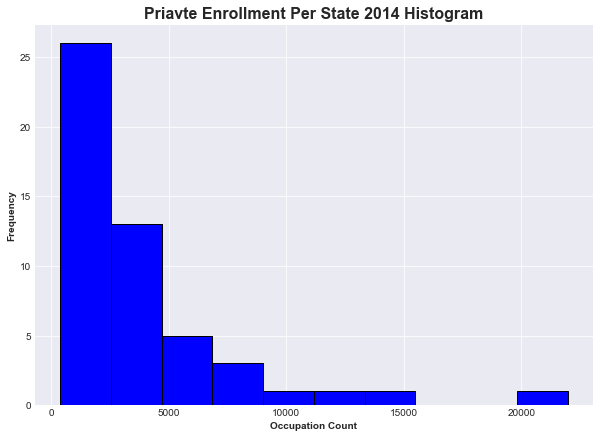

In [98]:
HealthInsDF['Private Enrollment Per State (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Priavte Enrollment Per State 2014 Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Occupation Count', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

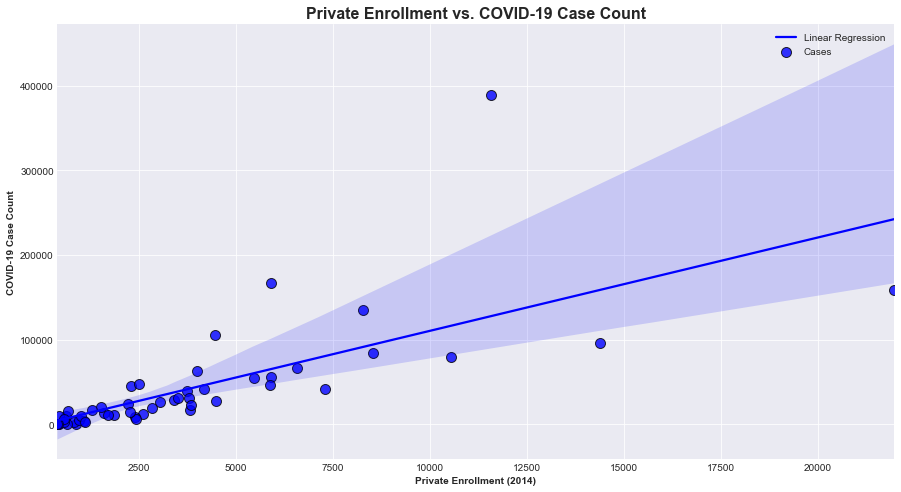

In [99]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Private Enrollment Per State (2014)', y = 'cases', data = HealthInsDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Private Enrollment vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Private Enrollment (2014)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [100]:
spearmanr(HealthInsDF['cases'], HealthInsDF['Private Enrollment Per State (2014)'])

SpearmanrResult(correlation=0.9001561123596233, pvalue=2.5825568316332304e-19)

In [101]:
model4 = sm.OLS(HealthInsDF['cases'], HealthInsDF['Private Enrollment Per State (2014)']).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.639
Method:                 Least Squares   F-statistic:                              91.37
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    7.18e-13
Time:                        23:02:27   Log-Likelihood:                         -618.77
No. Observations:                  51   AIC:                                      1240.
Df Residuals:                      50   BIC:                                      1241.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Private Enrollment Per State (2014)    11.0703      1.158      9.559      0.000       8.744      13.397
==============================================================================
Omnibus:                       75.731   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              996.424
Skew:                           3.901   Prob(JB):                    4.26e-217
Kurtosis:                      23.200   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

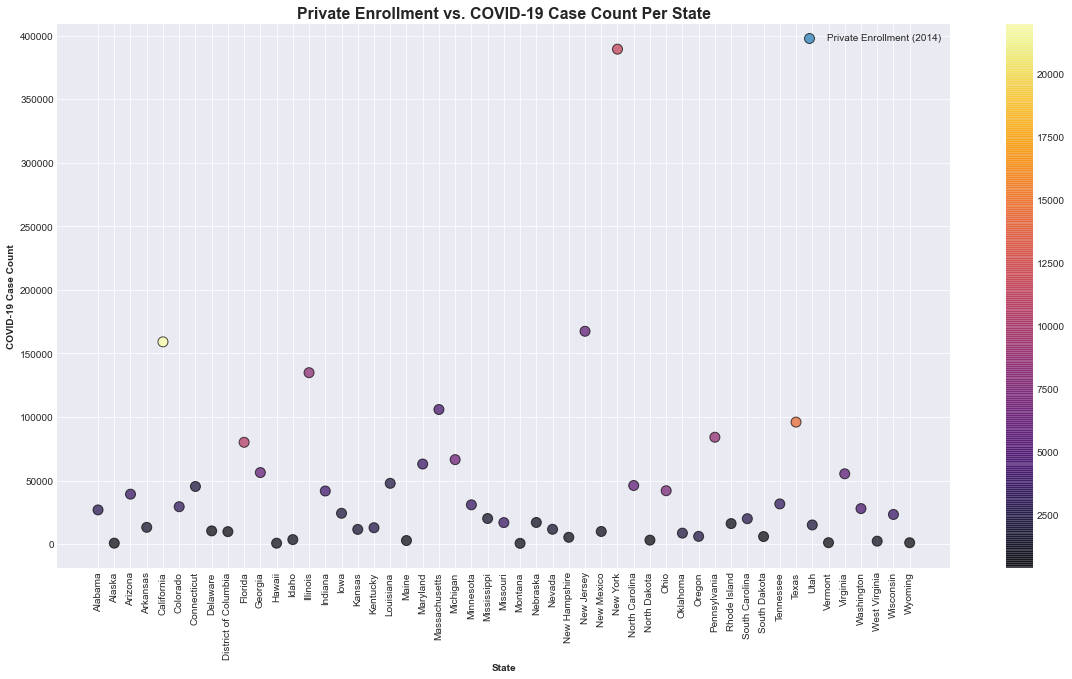

In [102]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HealthInsDF['State'] 
y = HealthInsDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HealthInsDF['Private Enrollment Per State (2014)'], cmap = 'inferno')
plt.title('Private Enrollment vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Private Enrollment (2014)'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

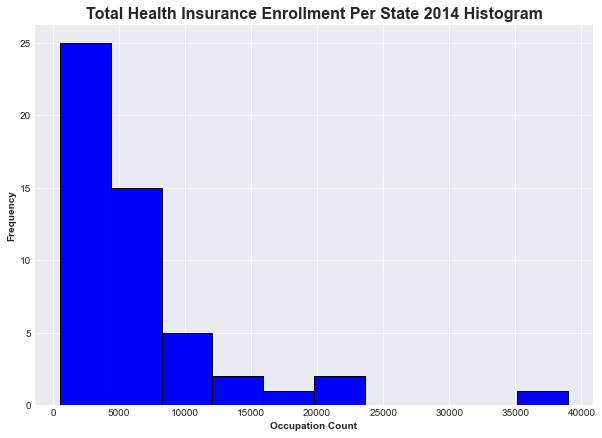

In [103]:
HealthInsDF['Total Health Insurance Enrollment Per State (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Total Health Insurance Enrollment Per State 2014 Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Occupation Count', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

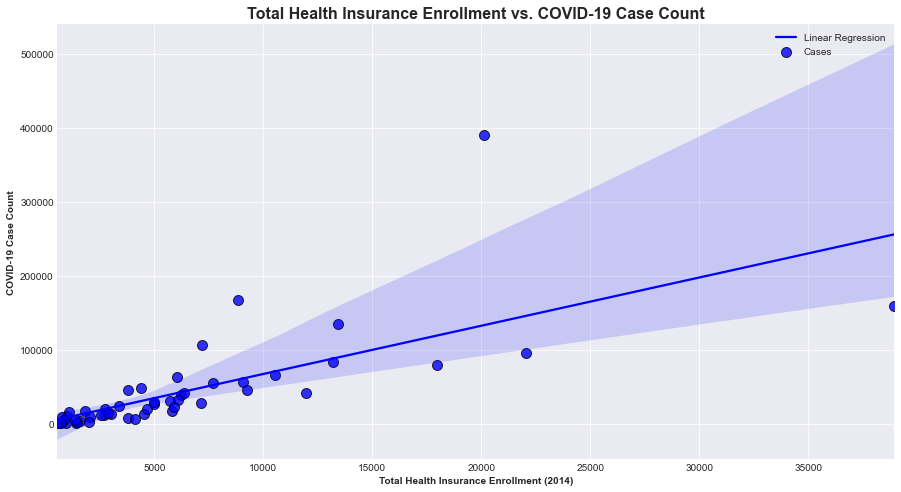

In [104]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Total Health Insurance Enrollment Per State (2014)', y = 'cases', data = HealthInsDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Total Health Insurance Enrollment vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Total Health Insurance Enrollment (2014)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [105]:
spearmanr(HealthInsDF['cases'], HealthInsDF['Total Health Insurance Enrollment Per State (2014)'])

SpearmanrResult(correlation=0.9058823529411765, pvalue=6.501402515653807e-20)

In [106]:
model1 = sm.OLS(HealthInsDF['cases'], HealthInsDF['Total Health Insurance Enrollment Per State (2014)']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.648
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              91.98
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    6.43e-13
Time:                        23:02:28   Log-Likelihood:                         -618.66
No. Observations:                  51   AIC:                                      1239.
Df Residuals:                      50   BIC:                                      1241.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Total Health Insurance Enrollment Per State (2014)     6.6820      0.697      9.591      0.000       5.283       8.081
==============================================================================
Omnibus:                       70.718   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              821.819
Skew:                           3.563   Prob(JB):                    3.50e-179
Kurtosis:                      21.329   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

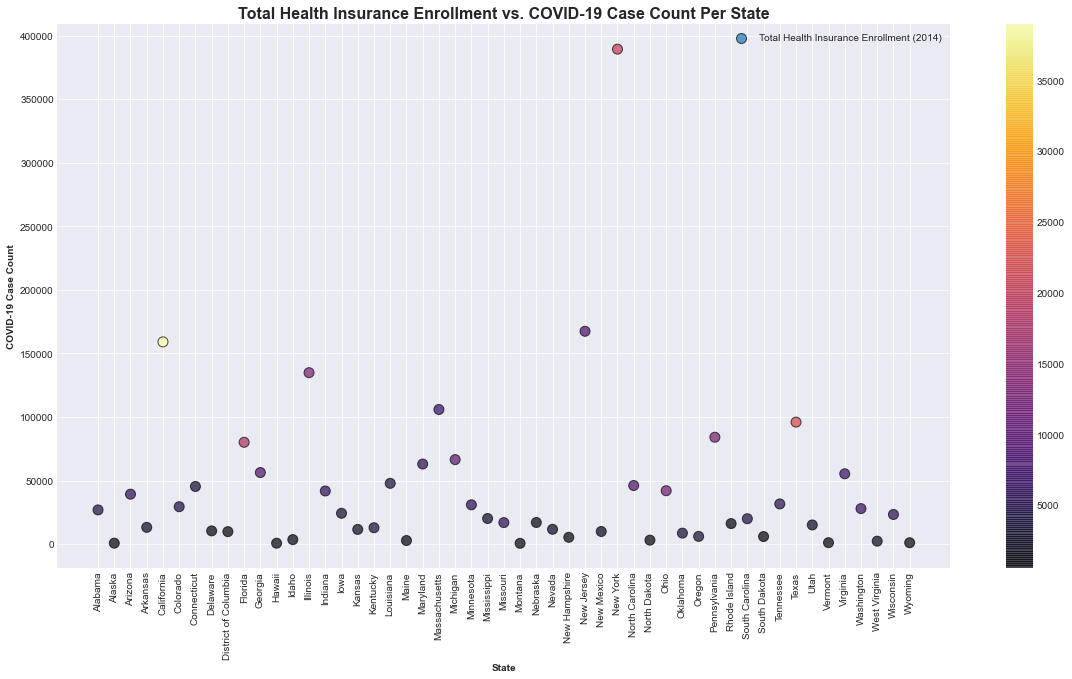

In [107]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HealthInsDF['State'] 
y = HealthInsDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HealthInsDF['Total Health Insurance Enrollment Per State (2014)'], cmap = 'inferno')
plt.title('Total Health Insurance Enrollment vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Total Health Insurance Enrollment (2014)'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

In [108]:
model5 = sm.OLS(HealthInsDF['cases'], HealthInsDF[['Total Health Insurance Enrollment Per State (2014)', 'Medicare Enrollment Per State (2014)',
                                                  'Medicaid Enrollment Per State (2014)', 'Private Enrollment Per State (2014)']]).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.649
Model:                            OLS   Adj. R-squared (uncentered):              0.627
Method:                 Least Squares   F-statistic:                              29.54
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    5.71e-11
Time:                        23:02:28   Log-Likelihood:                         -618.60
No. Observations:                  51   AIC:                                      1243.
Df Residuals:                      48   BIC:                                      1249.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Total Health Insurance Enrollment Per State (2014)     6.0815      6.411      0.949      0.348      -6.808      18.971
Medicare Enrollment Per State (2014)                   8.2859     26.497      0.313      0.756     -44.990      61.561
Medicaid Enrollment Per State (2014)                  -1.5986     10.154     -0.157      0.876     -22.014      18.817
Private Enrollment Per State (2014)                   -0.6058     16.591     -0.037      0.971     -33.964      32.753
==============================================================================
Omnibus:                       71.997   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              845.000
Skew:                           3.664   Prob(JB):                    3.24e-184
Kurtosis:                      21.546   Cond. No.                     4.61e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.87e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""